In [0]:
import numpy as np
a = np.random.random((10,3))
print(a)
mark = (np.abs(0.5 - a).argmin(axis = 1))
#print(mark)
for i in range(10):
  print( a[i][mark [i]])

[[0.94810349 0.1994044  0.27283679]
 [0.10213582 0.20261491 0.91324547]
 [0.53529787 0.30599741 0.23872306]
 [0.66821376 0.50412394 0.68481454]
 [0.15438418 0.40039492 0.15451215]
 [0.16419138 0.27478628 0.53740318]
 [0.90577933 0.90992496 0.23088361]
 [0.61764004 0.79834932 0.43029914]
 [0.88415917 0.00923155 0.92511359]
 [0.40408037 0.3411619  0.56502908]]
0.27283678826323365
0.20261490936507387
0.5352978673787407
0.5041239405090489
0.400394917506384
0.5374031821618623
0.23088360734306423
0.4302991382932354
0.8841591712207489
0.5650290831426931


In [0]:
|import numpy as np
a = np.random.random((6,6))
print(a)
mask = a.sum(axis = 1)/a.min(axis=1)
print(mask)

[[0.99664622 0.36258757 0.46155228 0.05226052 0.53398502 0.85953701]
 [0.26151945 0.43553686 0.40693787 0.78434225 0.2751278  0.77297221]
 [0.79238327 0.62373408 0.55803373 0.01586872 0.31165393 0.16047894]
 [0.87842751 0.37384166 0.36209164 0.13282587 0.31523505 0.39237955]
 [0.19274656 0.0533383  0.8308115  0.25967404 0.07230403 0.83328731]
 [0.06631508 0.30190665 0.34319705 0.28184693 0.98807411 0.9298355 ]]
[ 62.50547685  11.22836742 155.15763864  18.48134945  42.03661892
  43.89914455]


In [0]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max(x[i] for i in range(1, len(x)) if x[i-1] == 0)

5

In [0]:
import numpy as np
x = np.ones(10)
y = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for i in y:
  x[i] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [0]:
import numpy as np
a = np.arange(16).reshape(4, 4)
d = { i : [a[k][l] for k in range(4) for l in range(4) if k+l ==i] for i in range(7)}
print(d)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


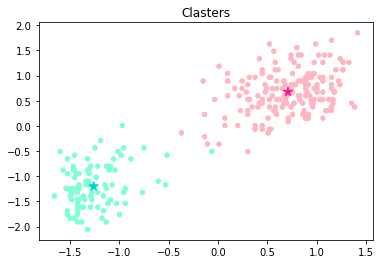

In [5]:
import numpy as np
import scipy.cluster
import matplotlib.pyplot as plt
    
    
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)

def get_labels(pts, centroids):
    
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def normtotal(obs, centroids, labels):
    temp = 0
    for i in range(centroids.shape[0]):
        temp += abs(np.linalg.norm(obs[i==labels] - centroids[i], axis = 1).sum())
    return temp
def kmeans(obs, k_or_guess, iter = 20, thresh = 1e-05):
    centroids = np.random.random((k_or_guess, obs.shape[1]))
    labels = get_labels(obs, centroids)
    norminitial = normtotal(obs, centroids, labels)
    minnorm = norminitial
    newcetroids = centroids
    
    for i in range(iter):
        normstop = norminitial
        centroids = np.array([obs[labels == i].mean(axis = 0) for i in range (k_or_guess)])
        labels = get_labels(obs, centroids)
        norminitial = normtotal(obs, centroids, labels)
        if norminitial < minnorm:
            newcetroids = centroids
            minnorm = norminitial
        if abs(norminitial - normstop) < thresh: 
            break
            
    return newcetroids
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "aquamarine","lightpink"), s=20)
plt.scatter(*centroids.T, c=["deeppink", "darkturquoise"], s=95, marker='*')
plt.title('Clasters')
plt.show()



